<a href="https://colab.research.google.com/github/yongsiangong/fashion_mnist/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion mnist

Source: https://github.com/zalandoresearch/fashion-mnist

The goal of this exercise it to use CNN on the fashion mnist dataset

In [ ]:
# Loading the fashion mnist dataset
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Create the class names
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']
num_classes = len(class_names)

In [ ]:
# Explore the data
print(f'There are {train_images.shape[0]} labels in the training set and {test_images.shape[0]} labels in the test set')

There are 60000 labels in the training set and 10000 labels in the test set


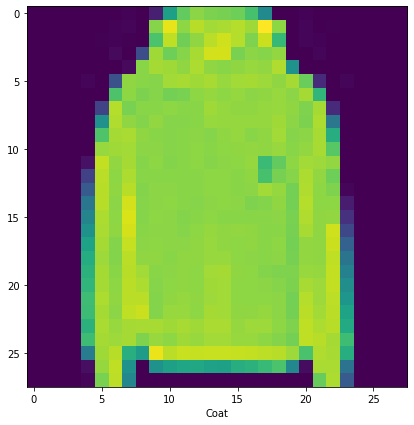

In [ ]:
# Visualize the test set
from random import randrange
import matplotlib.pyplot as plt

random_num = randrange(train_images.shape[0])

plt.figure(figsize=(10,7))
plt.imshow(train_images[random_num])
plt.xlabel(class_names[train_labels[random_num]])
plt.show()

In [ ]:
# Normalize and one-hot-encode the train and test set
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
# Create and train model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(64, 3, activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2), 
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(32, 3, activation='relu'), 
                                    tf.keras.layers.MaxPooling2D(2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy']) 

history = model.fit(train_images, 
                    train_labels, 
                    epochs=20,
                    validation_data = (test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7135 - accuracy: 0.7318 - val_loss: 0.4998 - val_accuracy: 0.8144
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4934 - accuracy: 0.8201 - val_loss: 0.4056 - val_accuracy: 0.8543
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4369 - accuracy: 0.8410 - val_loss: 0.3763 - val_accuracy: 0.8619
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4039 - accuracy: 0.8527 - val_loss: 0.3599 - val_accuracy: 0.8665
Epoch 5/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3880 - accuracy: 0.8591 - val_loss: 0.3417 - val_accuracy: 0.8760
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3713 - accuracy: 0.8651 - val_loss: 0.3343 - val_accuracy: 0.8751
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3595 - accuracy: 0.8675 - val_loss: 0.3314 - val_accurac

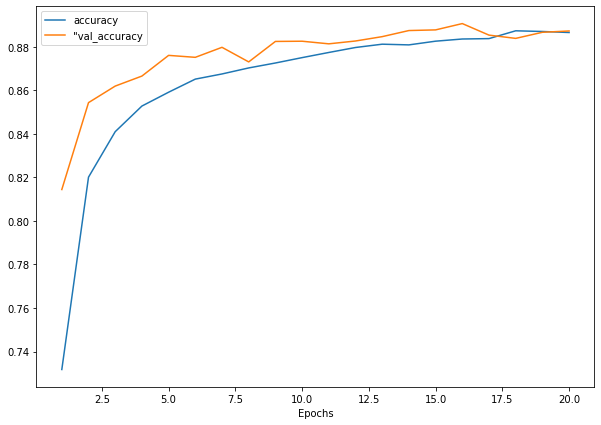

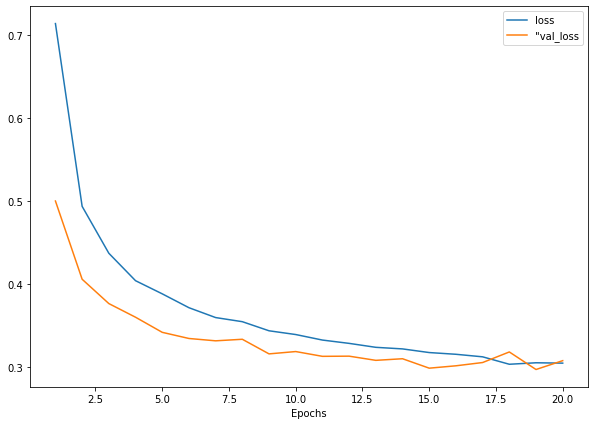

In [ ]:
# Visualize the loss and accuracy curves

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(np.arange(1,21), history.history['accuracy'], label = 'accuracy')
plt.plot(np.arange(1,21), history.history['val_accuracy'], label = '"val_accuracy')
plt.xlabel("Epochs")
plt.legend();

plt.figure(figsize=(10,7))
plt.plot(np.arange(1,21), history.history['loss'], label = 'loss')
plt.plot(np.arange(1,21), history.history['val_loss'], label = '"val_loss')
plt.xlabel("Epochs")
plt.legend();

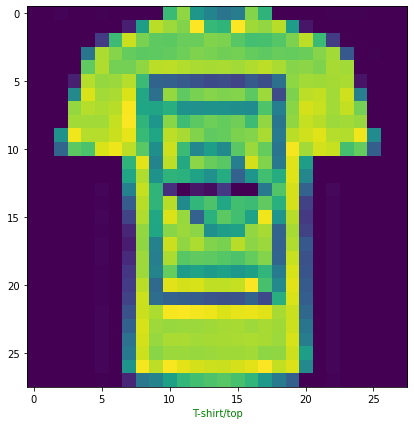

In [ ]:
# Visualize the prediction for a random test sample

random_test_num = randrange(test_images.shape[0])

pred_prob = model.predict(tf.expand_dims(test_images[random_test_num], axis = 0))
pred = class_names[tf.argmax(tf.squeeze(pred_prob))]
actual = class_names[tf.argmax(tf.squeeze(test_labels[random_test_num]))]

if pred == actual:
  color = 'green'
else:
  color = 'red'

plt.figure(figsize=(10,7))
plt.imshow(test_images[random_test_num])
plt.xlabel(pred, color = color)
plt.show()
